# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.166006e+01     8.085465e+00
 * time: 0.0020961761474609375
     1     2.859292e+01     5.056955e+00
 * time: 0.00828099250793457
     2     1.866452e+01     4.480108e+00
 * time: 0.015400171279907227
     3     1.299429e+01     2.851900e+00
 * time: 0.022370100021362305
     4     1.137390e+01     2.765726e+00
 * time: 0.06151914596557617
     5     1.068620e+01     2.165975e+00
 * time: 0.0662071704864502
     6     9.781651e+00     1.859795e+00
 * time: 0.07062816619873047
     7     8.878853e+00     1.183380e+00
 * time: 0.07504010200500488
     8     8.397215e+00     8.161064e-01
 * time: 0.07961702346801758
     9     8.227239e+00     5.337887e-01
 * time: 0.08492016792297363
    10     8.135440e+00     5.107976e-01
 * time: 0.09040117263793945
    11     8.064556e+00     6.358250e-01
 * time: 0.09447002410888672
    12     8.022453e+00     8.597520e-01
 * time: 0.09876513481140137
    13     7.959678e+00     4.532518e-01
 * ti

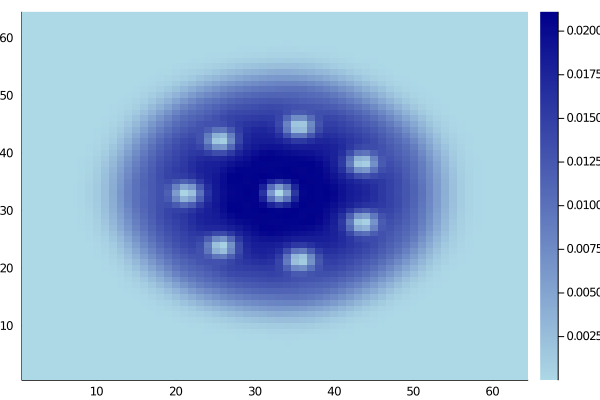

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)